In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris() 
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

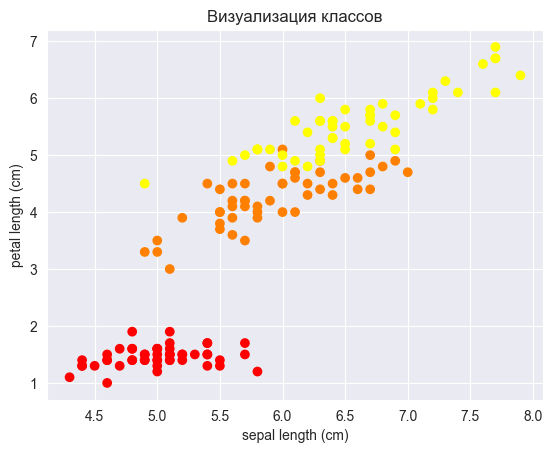

In [5]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

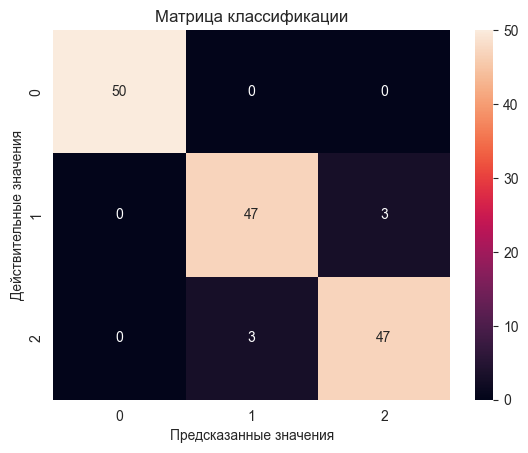

In [9]:
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [10]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



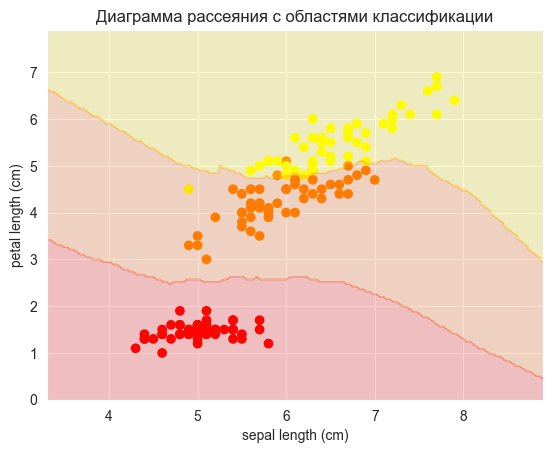

In [11]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

XX_df = pd.DataFrame(XX, columns=X.columns)
XX_scaled = scaler.transform(XX_df)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [12]:
# Самост 2 Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?
observation_new = [[5.5, 5]]

In [13]:
observation_new_df = pd.DataFrame(observation_new, columns=X.columns)
observation_new_scaled = scaler.transform(observation_new_df)
print("Нормализованное представление точки:", observation_new_scaled)

Нормализованное представление точки: [[0.33333333 0.6779661 ]]


In [14]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [15]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [16]:
distances, indices = knn.kneighbors(observation_new_scaled)

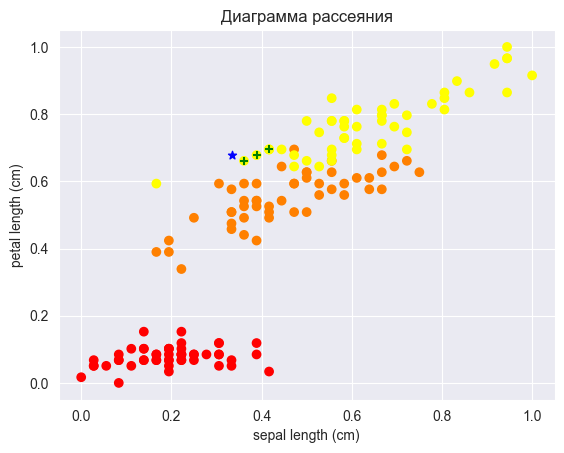

In [17]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

for i in range(len(indices[0])):
    plt.scatter(X_scaled[indices[0]][i][0], X_scaled[indices[0]][i][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

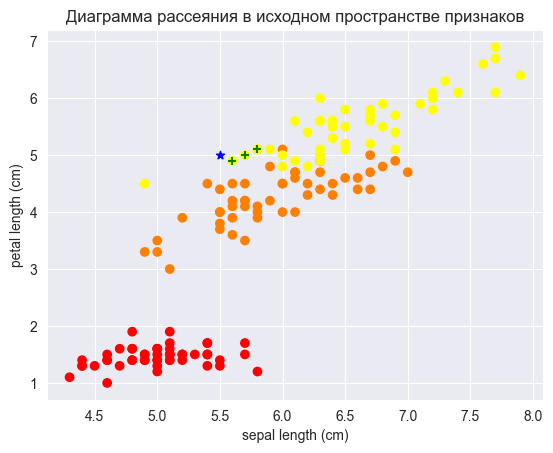

In [18]:
# Самост 1 Постройте последний график методических указаний в исходном пространстве признаков
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')

for i in indices[0]:
    plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='+', color='g')

plt.title("Диаграмма рассеяния в исходном пространстве признаков")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

In [19]:
# Самост 2 Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.
iris = load_iris() 
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


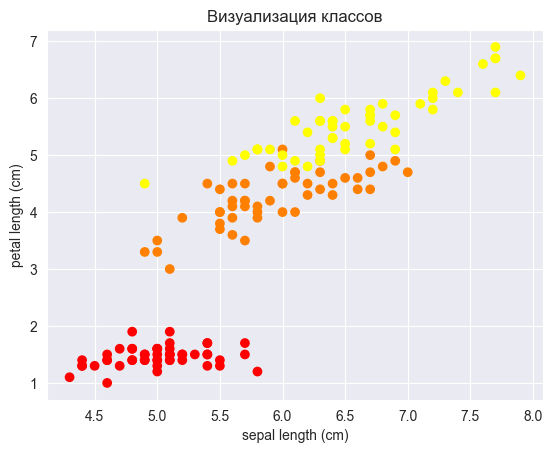

In [20]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

Число соседей: 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.85      1.00      0.92        50
           2       1.00      0.82      0.90        50

    accuracy                           0.94       150
   macro avg       0.95      0.94      0.94       150
weighted avg       0.95      0.94      0.94       150



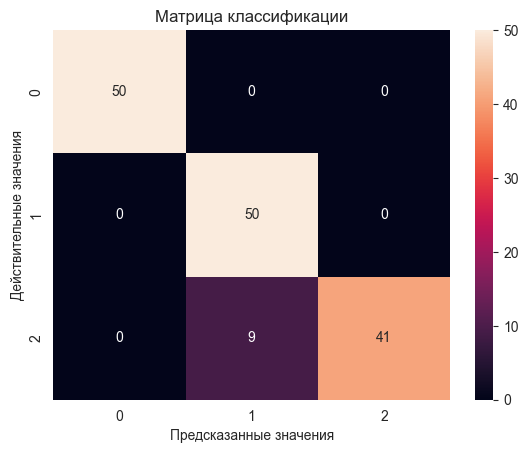

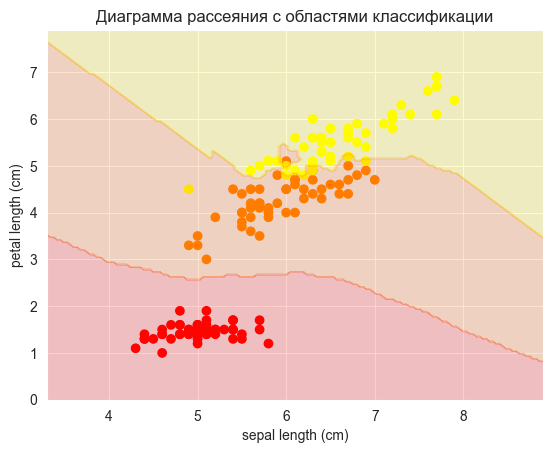

Число соседей: 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



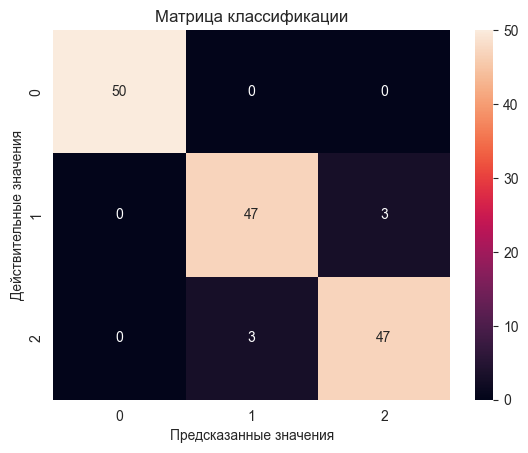

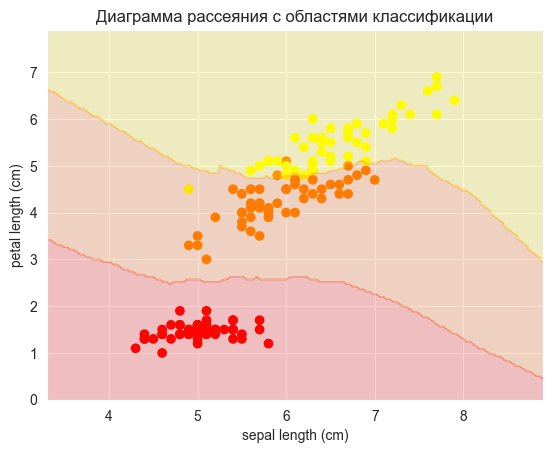

Число соседей: 5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



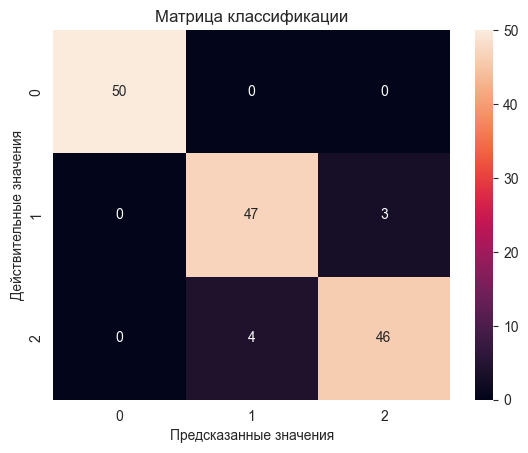

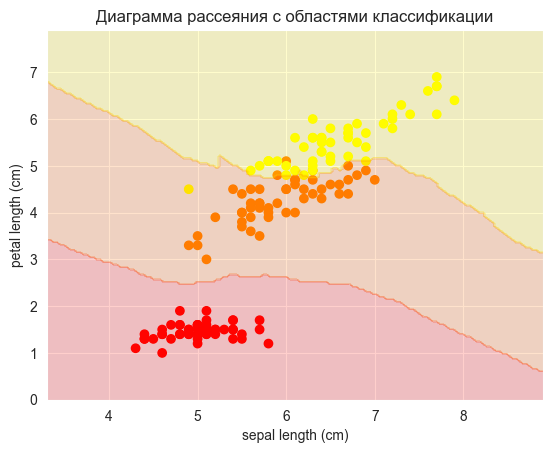

Число соседей: 10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.89      0.94      0.91        50
           2       0.94      0.88      0.91        50

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



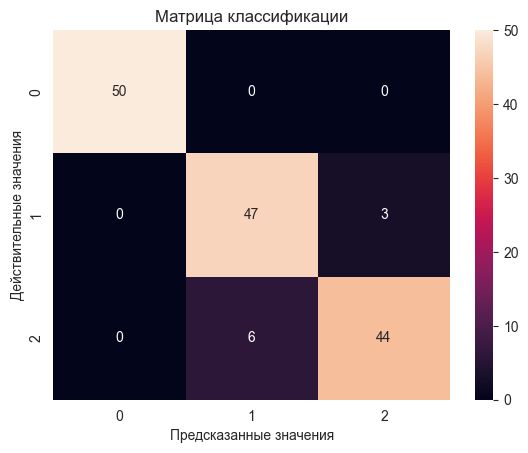

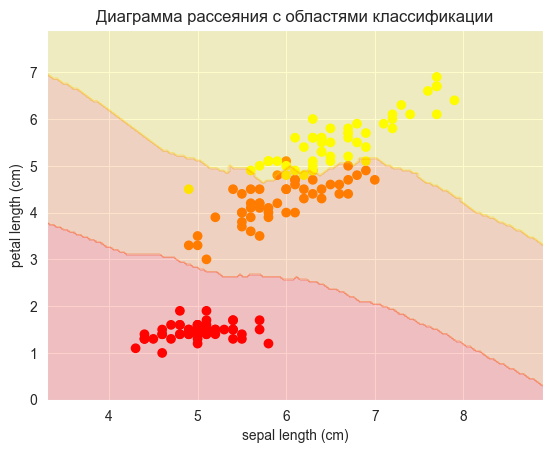

Число соседей: 15
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.92      0.93        50
           2       0.92      0.94      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



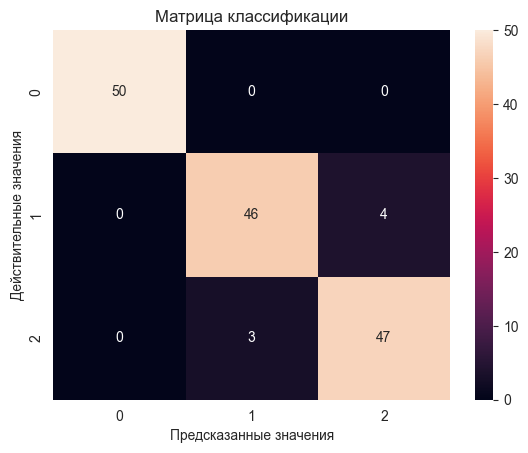

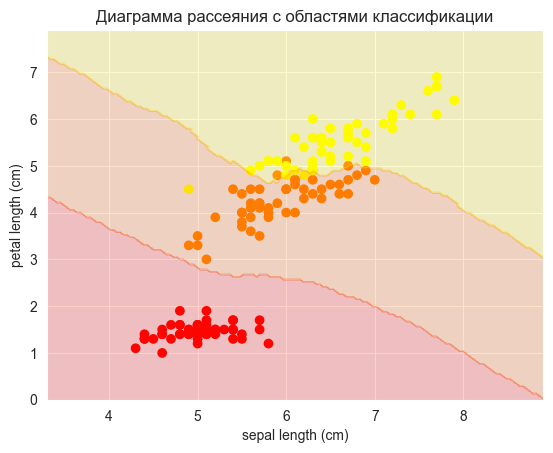

Число соседей: 25
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.90      0.90      0.90        50
           2       0.90      0.90      0.90        50

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



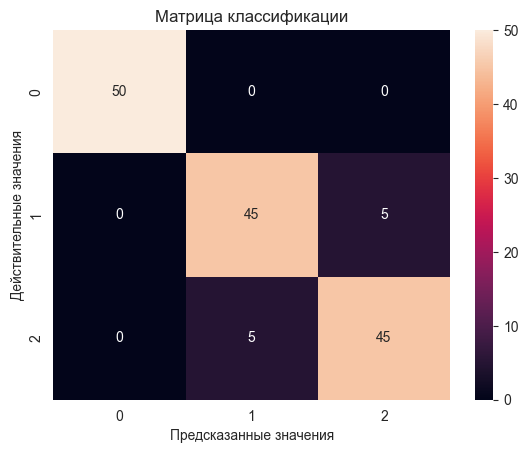

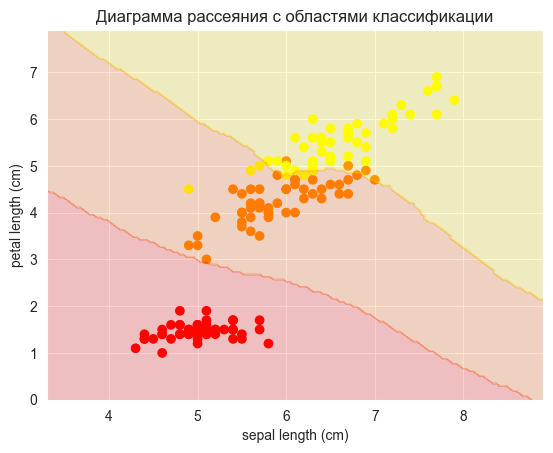

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

neighbors = [2, 3, 5, 10, 15, 25]

for n in neighbors:
    print("Число соседей:", n)
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_scaled, y)
    
    y_pred = knn.predict(X_scaled)
    print(classification_report(y, y_pred))
    
    plt.figure()
    plt.title("Матрица классификации")
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d')
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()
    
    X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
    X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])
    
    X0_grid, X1_grid = np.meshgrid(X0, X1)
    
    XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T
    
    XX_df = pd.DataFrame(XX, columns=X.columns)
    XX_scaled = scaler.transform(XX_df)
    Z = knn.predict(XX_scaled).reshape(X0_grid.shape)
    
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
    plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)
    
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')
    plt.title("Диаграмма рассеяния с областями классификации")
    plt.show()

Метрика расстояния: euclidean
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



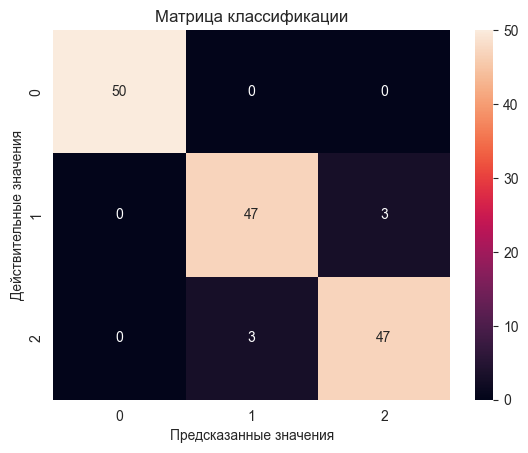

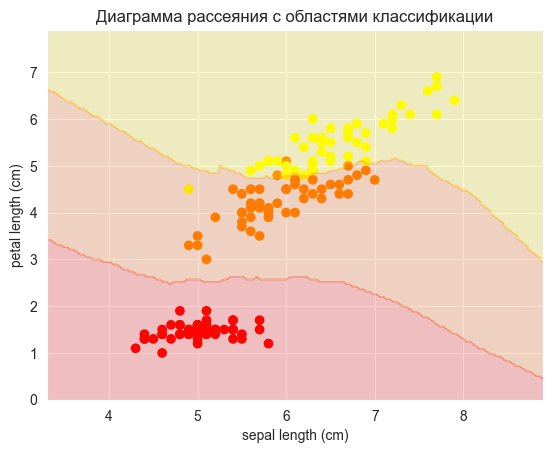

Визуализация соседей нового объекта
Нормализованное представление точки: [[0.61111111 0.42372881]]


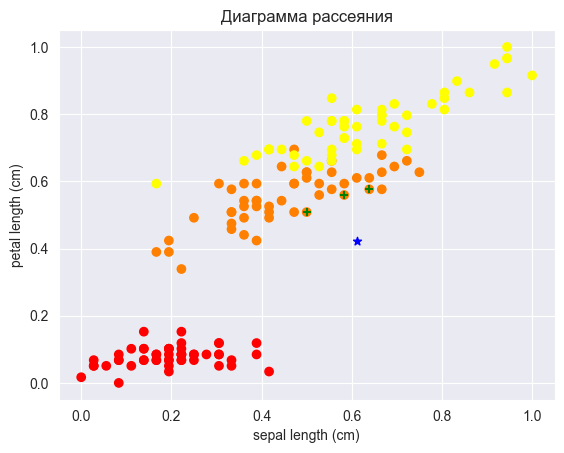

Метрика расстояния: manhattan
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



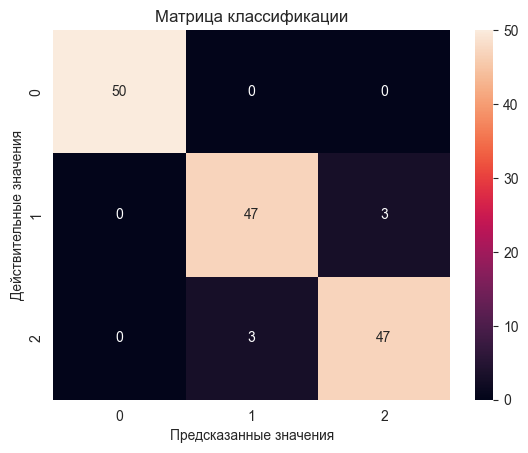

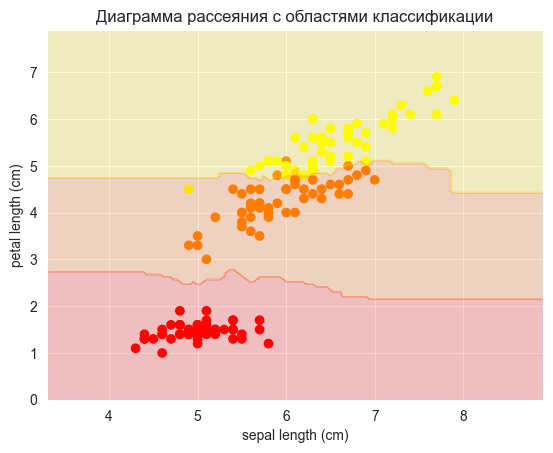

Визуализация соседей нового объекта
Нормализованное представление точки: [[0.61111111 0.42372881]]


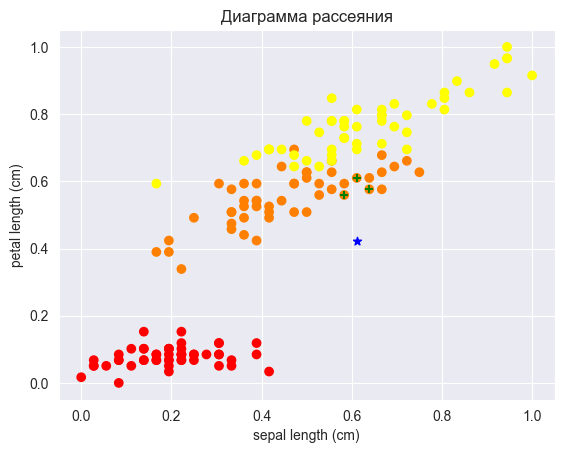

Метрика расстояния: chebyshev
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



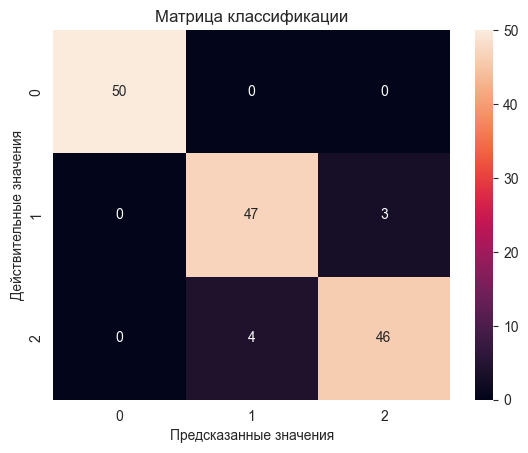

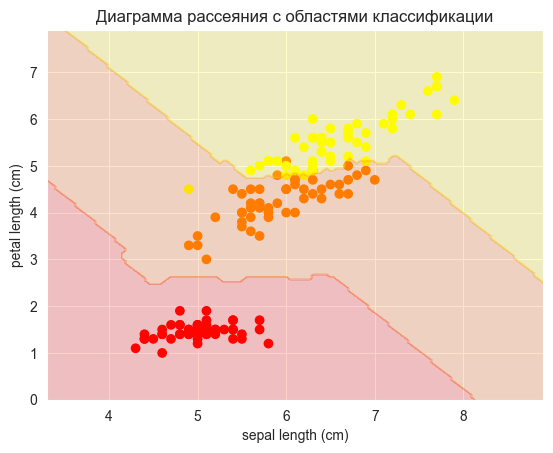

Визуализация соседей нового объекта
Нормализованное представление точки: [[0.61111111 0.42372881]]


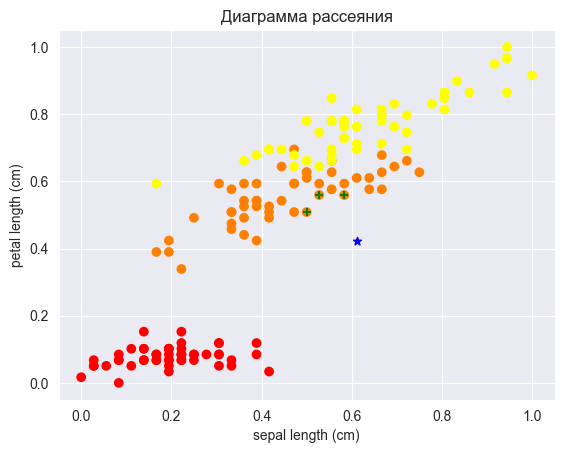

In [22]:
# Самост 5 Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

for metric in ['euclidean', 'manhattan', 'chebyshev']:
    print("Метрика расстояния:", metric)
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_scaled, y)
    
    y_pred = knn.predict(X_scaled)
    print(classification_report(y, y_pred))
    
    plt.figure()
    plt.title("Матрица классификации")
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d')
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()
    
    X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
    X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])
    
    X0_grid, X1_grid = np.meshgrid(X0, X1)
    
    XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T
    
    XX_df = pd.DataFrame(XX, columns=X.columns)
    XX_scaled = scaler.transform(XX_df)
    Z = knn.predict(XX_scaled).reshape(X0_grid.shape)
    
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
    plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)
    
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')
    plt.title("Диаграмма рассеяния с областями классификации")
    plt.show()
    
    print("Визуализация соседей нового объекта")
    observation_new = [[6.5, 3.5]]
    observation_new_df = pd.DataFrame(observation_new, columns=X.columns)
    observation_new_scaled = scaler.transform(observation_new_df)
    print("Нормализованное представление точки:", observation_new_scaled)
    knn.predict_proba(observation_new_scaled)
    knn.predict_proba(observation_new_scaled)
    distances, indices = knn.kneighbors(observation_new_scaled)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
    
    plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')
    
    for i in range(len(indices[0])):
        plt.scatter(X_scaled[indices[0]][i][0], X_scaled[indices[0]][i][1], marker='+', color='g')
    
    plt.title("Диаграмма рассеяния")
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')
    plt.show()